# Visualizing clusters
## Waterfall plot 

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume.pylab as p3
import ipyvolume as ipv

In [3]:
cluster_stats = pd.read_csv('cluster_stats.csv', header=[0,1], index_col=0)
cluster_stats_scaled = pd.read_csv('cluster_stats_scaled.csv', header=[0,1], index_col=0)

In [4]:
def plot_waterfall(cluster_stats_scaled, stat1, feature1, mode='line', scope='local', reverse=False):
    fig = plt.figure()
    ax = Axes3D(fig)

    verts = []

    if scope == 'all':
        arr = cluster_stats_scaled
        vals = arr.values

    elif scope == 'local':
        arr = cluster_stats_scaled[feature1]
        vals = arr.values

    elif scope == 'stats':
        arr = cluster_stats_scaled.iloc[:, cluster_stats_scaled.columns.get_level_values(1) == stat1]
        vals = arr.values

    else:
        raise ValueError('No such scope.')

    if reverse == False:
        xs = list(range(len(arr.columns)))

        zs = np.arange(0, np.shape(vals)[0] + 2).astype('float')
        zs[0], zs[-1] = zs[1] - 0.000001, zs[-2] + 0.000001

        xt, yt = zs, xs
        xtlab = [' '] + list(zs[1:-1].copy().astype(int) - 1)
        ytlab = list(arr.columns)
        ax.set_xlabel('Cluster')

        for idx in range(np.shape(vals)[1]):
            ys = vals[:, idx]
            ys = np.append(np.insert(ys, 0, 0), 0)
            verts.append(list(zip(zs, ys)))
            face = xs

        # to scale the axes relative to each other
        ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6, 1.8, 0.4, 1]))
        plt.setp(ax.get_yticklabels(), rotation=90, fontsize=8)

    else:
        xs = list(range(len(arr.columns) + 2))
        xs[0], xs[-1] = xs[1] - 0.000001, xs[-2] + 0.000001

        zs = np.arange(0, np.shape(vals)[0]).astype('float')

        xt, yt = xs, zs
        ytlab = list(zs.copy().astype(int))
        xtlab = [' '] + list(arr.columns.copy())
        ax.set_ylabel('Cluster')

        for idx in range(np.shape(vals)[0]):
            ys = vals[idx, :]
            ys = np.append(np.insert(ys, 0, 0), 0)
            verts.append(list(zip(xs, ys)))
            face = zs

        # sort verts
        v_tmp = []
        for cluster in range(np.shape(vals)[0]):
            v_tmp.append(np.sum(verts[cluster][-4:]))

        sortindices = np.argsort(v_tmp)[::-1]
        vt = []
        for idx in sortindices:
            vt.append(verts[idx])
        verts = vt
        ytlab = sortindices

        # to scale the axes relative to each other
        ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.6, 0.6, 1]))
        plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8)

    if mode == 'poly':
        poly = PolyCollection(verts, edgecolors='k', facecolors=np.random.random((len(face), 3)))
        poly.set_alpha(0.8)
        ax.add_collection3d(poly, zs=face, zdir='y')

    elif mode == 'line':
        for clstr in range(len(zs)):
            xs, ys = zip(*verts[clstr])
            ax.plot(xs[1:-1], np.ones(len(xs))[1:-1] * zs[clstr], ys[1:-1], marker='o')
            ax.text(xs[1], zs[clstr], ys[1], '%s' % (str(clstr)), size=10, zorder=1, color='r')

    else:
        raise ValueError('No such mode.')

    ax.set_xlim3d(0, len(xt))
    ax.set_xticks(xt)
    ax.set_xticklabels(xtlab)
    ax.set_yticks(yt)
    ax.set_yticklabels(ytlab)
    ax.set_zlabel('Magnitude')

    return None

In [5]:
# p3.scatter

<IPython.core.display.Javascript object>


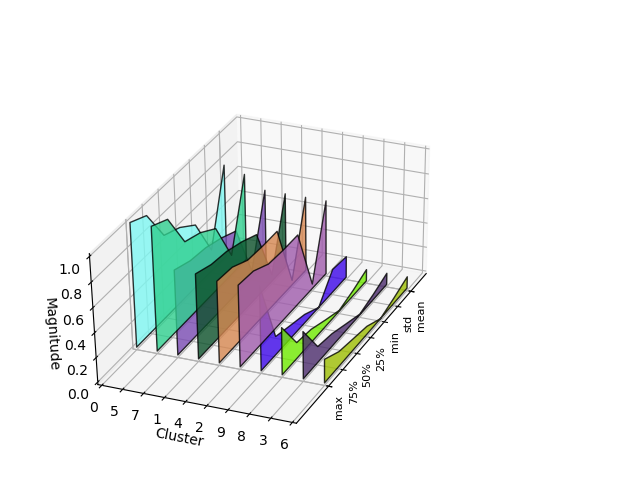

In [6]:
stat1, feature1 = 'mean', 'Frequency last 10 days'
plot_waterfall(cluster_stats_scaled, stat1, feature1, scope='local', mode='poly', reverse=True)